In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from folium import plugins
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font", family = "Malgun Gothic")
import json

In [133]:
df = pd.read_csv('jeonju_data\jeonju_pop_an.csv',encoding='cp949')

In [134]:
df['OBJECTID']=df['OBJECTID'].str.replace(',', '').astype(int)
df['adm_cd']=df['adm_cd'].astype(str)
df['합계']=df['합계'].str.replace(',', '').astype(int)

In [135]:
df.head()

,구분,세대수,합계,남,여,경도,위도,OBJECTID,adm_cd
0,동서학동,"3,224",6247,"3,085","3,162",127.170398,35.795679,2221,3501160
1,서서학동,"4,470",8462,"4,124","4,338",127.146130,35.798375,2222,3501161
2,중화산1동,"6,365",14027,"6,738","7,289",127.128530,35.811399,2223,3501162
3,중화산2동,"9,191",19450,"9,728","9,722",127.121000,35.822872,2224,3501163
4,평화1동,"7,206",12621,"6,093","6,528",127.137673,35.796710,2225,3501164


In [136]:
state_geo = 'jeonju.geojson'
state_geo2 = json.load(open(state_geo,encoding='utf-8'))

In [274]:
m_1 =  folium.Map(location=[35.8242238,127.1479532], tiles='openstreetmap', zoom_start=11)

In [275]:
m_1

In [276]:
choropleth = folium.Choropleth(
            geo_data = state_geo2,
            name = 'people',
            data=df,
            columns = ['OBJECTID','합계'],
            key_on= 'feature.properties.OBJECTID', 
            fill_color = 'PuRd',
            fill_opacity=0.7,
            line_opacity=0.5,
            legend_name = 'people index').add_to(m_1)

plugins.Fullscreen(position='topright',
                  title='Click to Expand',
                  title_cancel = 'Click to Exit',
                  force_separate_button = True).add_to(m_1)


In [277]:
m_1

In [259]:
df1 = pd.read_csv('re_jeonju_dong_ta.csv',encoding='cp949')

In [260]:
m_2 =  folium.Map(location=[35.8242238,127.1479532], tiles='openstreetmap', zoom_start=11)

In [261]:
choropleth = folium.Choropleth(
            geo_data = state_geo2,
            name = 'people',
            data=df1,
            columns = ['OBJECTID','사고건수'],
            key_on= 'feature.properties.OBJECTID', 
            fill_color = 'PuRd',
            fill_opacity=0.7,
            line_opacity=0.5,
            legend_name = 'people index').add_to(m_2)

plugins.Fullscreen(position='topright',
                  title='Click to Expand',
                  title_cancel = 'Click to Exit',
                  force_separate_button = True).add_to(m_2)

In [262]:
m_2

In [184]:
df2 = pd.read_csv('dong_cctv.csv',encoding='cp949')

In [269]:
m_3 =  folium.Map(location=[35.8242238,127.1479532], tiles='openstreetmap', zoom_start=11)

In [270]:
choropleth = folium.Choropleth(
            geo_data = state_geo2,
            name = 'people',
            data=df2,
            columns = ['OBJECTID','CCTV수'],
            key_on= 'feature.properties.OBJECTID', 
            fill_color = 'PuRd',
            fill_opacity=0.7,
            line_opacity=0.5,
            legend_name = 'cctv index').add_to(m_3)

plugins.Fullscreen(position='topright',
                  title='Click to Expand',
                  title_cancel = 'Click to Exit',
                  force_separate_button = True).add_to(m_3)

In [271]:
m_3

In [192]:
m_4 =  folium.Map(location=[35.8242238,127.1479532], tiles='openstreetmap', zoom_start=11)

In [206]:
parking = pd.read_csv('jeonju_data\jeonju_parking.csv',encoding='cp949')
parking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   주차장명    81 non-null     object 
 1   주차면수    81 non-null     object 
 2   운영시간    81 non-null     object 
 3   당일최고요금  81 non-null     object 
 4   주차요금    81 non-null     object 
 5   주 소     81 non-null     object 
 6   전화번호    20 non-null     object 
 7   비고      81 non-null     object 
 8   위치      81 non-null     object 
 9   lng     81 non-null     float64
 10  lat     81 non-null     float64
dtypes: float64(2), object(9)
memory usage: 7.1+ KB


In [211]:
parking_id = parking['주차장명']
parking_x = parking['lat']
parking_y = parking['lng']

In [215]:
x = []
y = []
for i in range(len(parking['lat'])):
    if parking['lat'][i] == 0.0 or parking['lng'][i] == 0.0:
        pass
    else:

        x.append(parking['lat'][i])
        y.append(parking['lng'][i])
print('x갯수: ',len(x))
print('y갯수: ',len(y))

x갯수:  81
y갯수:  81


In [216]:
import folium
map_osm = folium.Map(location=[35.8242238,127.1479532], tiles='openstreetmap', zoom_start=11)
for i in range(len(x)):
    folium.Marker([x[i],y[i]], popup='공영주차장_%d'%i, icon=folium.Icon(color='red', icon='info-sign')).add_to(map_osm)
# 지도에서 범위 지정
folium.CircleMarker(location=[35.8242238,127.1479532],popup='공영주차장', radius=300, color="#3186cc", fill_color="#3186cc").add_to(map_osm)
#map저장
map_osm.save('jeonju_parking.html')

In [217]:
map_osm

In [210]:
parking['lng']

0     127.145193
1     127.134793
2     127.134722
3     127.124040
4     127.121718
         ...    
76    127.149587
77    127.064500
78    127.124580
79    127.106195
80    127.124300
Name: lng, Length: 81, dtype: float64

In [220]:
parking_dong = parking['위치'].value_counts()

In [221]:
parking_dong.to_csv("parking_dong.csv")

In [243]:
jeonju = pd.read_csv('jeonju_data\jeonju_data_re.csv',encoding='cp949')

In [244]:
jeonju['세대수']=jeonju['세대수'].str.replace(',', '').astype(int)
jeonju['합계']=jeonju['합계'].str.replace(',', '').astype(int)
jeonju['남']=jeonju['남'].str.replace(',', '').astype(int)
jeonju['여']=jeonju['여'].str.replace(',', '').astype(int)

In [250]:
data = jeonju[['세대수','합계','공영주차장','사고건수','cctv']]

In [251]:
data.corr()

,세대수,합계,공영주차장,사고건수,cctv
세대수,1.000000,0.983058,0.331322,0.067546,0.654136
합계,0.983058,1.000000,0.217277,0.073923,0.623002
공영주차장,0.331322,0.217277,1.000000,0.049095,0.547203
사고건수,0.067546,0.073923,0.049095,1.000000,-0.082232
cctv,0.654136,0.623002,0.547203,-0.082232,1.000000


<AxesSubplot:>

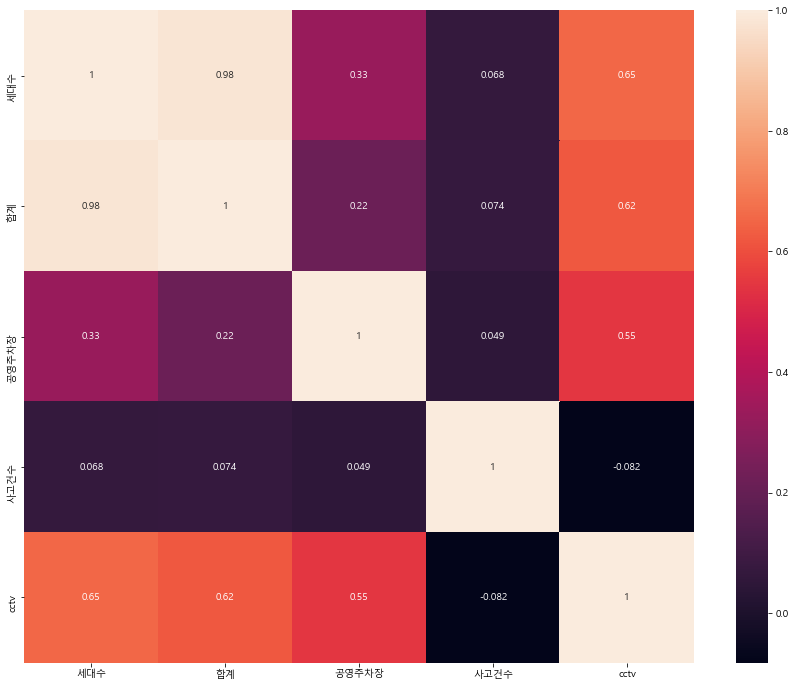

In [257]:
plt.figure(figsize=(15,12))
sns.heatmap(data=data.corr(), annot=True)